## Target:
- Albumentation Augmentation 
  - Horizontal flip
  - shiftScaleRotate
  - coarseDroupout
- learning rate schedule
- skeleton finalization 

## Result:
- train accuracy: 83.82%
- test accuracy: 83.5%

## Analysis:
- more augmentation
- increasing number of channels;
- cut out patches seems to be whole always, need to fix it
- Higher starting learning rate may be

# Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Dataset and Creating Train/Test Split

In [2]:
from data_loader import prepare_cifar_dataloader,\
    RAW_DATA_MEAN, NORM_DATA_MEAN, NORM_DATA_STD
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']
train_loader, test_loader = prepare_cifar_dataloader()

Files already downloaded and verified
Files already downloaded and verified


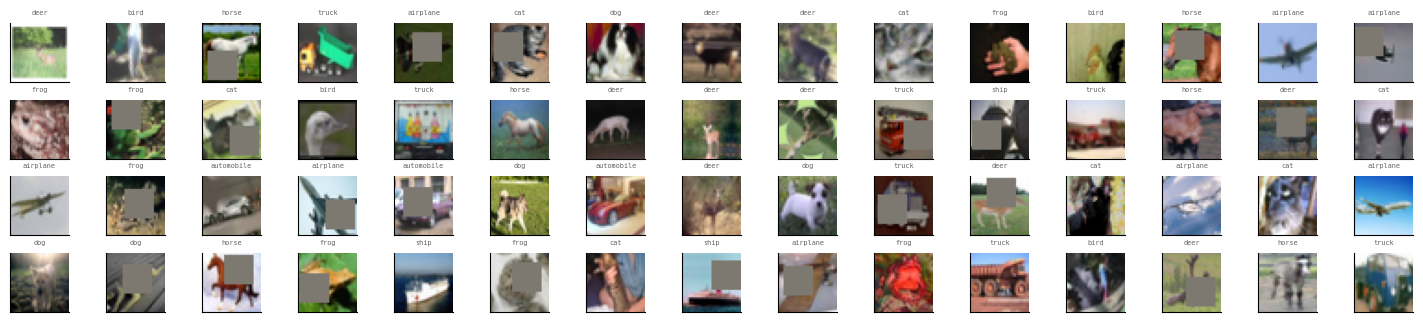

In [18]:
import numpy as np
import utils

utils.plot_img_batch(train_loader, class_labels, ncols=15, nrows=4)

In [6]:
from torchsummary import summary
import model
channels = [
    32, 32, 32, 64, 
    16, 64, 32, 64, 
    16, 64, 32, 64, 
    16, 64, 32, 128, 
    128, 10
]
network = model.Net(channels=channels, dropout_value=0.02).to('cpu')
summary(network, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]           4,704
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
         ConvLayer-9           [-1, 32, 32, 32]               0
           Conv2d-10           [-1, 32, 32, 32]           9,216
             ReLU-11           [-1, 32, 32, 32]               0
      BatchNorm2d-12           [-1, 32, 32, 32]              64
          Dropout-13           [-1, 32, 32, 32]               0
        ConvLayer-14           [-1, 32,

In [7]:
from torch import optim
from torchvision import datasets
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
from model import train, test, plot_loss_n_acc, get_pred_n_actuals
from utils import plot_misclassified_images

device = 'mps:0'
EPOCHS = 100
network.to(device)
optimizer = optim.Adam(network.parameters(), lr=0.01)
scheduler = ReduceLROnPlateau(optimizer, patience=3,
    threshold=1e-2, mode='max', factor=0.25)

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    model.train(network, device, train_loader, optimizer)
    test_acc = model.test(network, device, test_loader)
    scheduler.step(test_acc)

plot_loss_n_acc()


EPOCH: 0


Loss=1.5348 Batch_id=97 Accuracy=34.99: 100%|██████████| 98/98 [00:14<00:00,  6.65it/s]


Test set: Average loss: 1.7256, Accuracy: 4026/10000 (40.26%)

EPOCH: 1


Loss=1.4458 Batch_id=97 Accuracy=45.31: 100%|██████████| 98/98 [00:13<00:00,  7.24it/s]


Test set: Average loss: 1.4535, Accuracy: 4726/10000 (47.26%)

EPOCH: 2


Loss=1.4383 Batch_id=97 Accuracy=50.41: 100%|██████████| 98/98 [00:13<00:00,  7.27it/s]


Test set: Average loss: 1.2333, Accuracy: 5569/10000 (55.69%)

EPOCH: 3


Loss=1.0891 Batch_id=97 Accuracy=55.08: 100%|██████████| 98/98 [00:13<00:00,  7.13it/s]


Test set: Average loss: 1.1938, Accuracy: 5818/10000 (58.18%)

EPOCH: 4


Loss=1.0621 Batch_id=97 Accuracy=58.97: 100%|██████████| 98/98 [00:13<00:00,  7.28it/s]


Test set: Average loss: 1.1485, Accuracy: 6081/10000 (60.81%)

EPOCH: 5


Loss=1.0213 Batch_id=97 Accuracy=62.38: 100%|██████████| 98/98 [00:13<00:00,  7.31it/s]


Test set: Average loss: 0.9889, Accuracy: 6500/10000 (65.00%)

EPOCH: 6


Loss=0.8390 Batch_id=97 Accuracy=64.70: 100%|██████████| 98/98 [00:13<00:00,  7.37it/s]


Test set: Average loss: 0.9513, Accuracy: 6701/10000 (67.01%)

EPOCH: 7


Loss=0.8740 Batch_id=97 Accuracy=66.73: 100%|██████████| 98/98 [00:13<00:00,  7.38it/s]


Test set: Average loss: 0.8788, Accuracy: 6980/10000 (69.80%)

EPOCH: 8


Loss=0.9836 Batch_id=97 Accuracy=68.38: 100%|██████████| 98/98 [00:13<00:00,  7.39it/s]


Test set: Average loss: 0.8749, Accuracy: 6976/10000 (69.76%)

EPOCH: 9


Loss=0.8467 Batch_id=97 Accuracy=69.82: 100%|██████████| 98/98 [00:13<00:00,  7.39it/s]


Test set: Average loss: 0.8081, Accuracy: 7206/10000 (72.06%)

EPOCH: 10


Loss=0.8193 Batch_id=97 Accuracy=71.44: 100%|██████████| 98/98 [00:13<00:00,  7.17it/s]


Test set: Average loss: 0.8139, Accuracy: 7202/10000 (72.02%)

EPOCH: 11


Loss=0.7440 Batch_id=97 Accuracy=72.03: 100%|██████████| 98/98 [00:13<00:00,  7.17it/s]


Test set: Average loss: 0.7490, Accuracy: 7414/10000 (74.14%)

EPOCH: 12


Loss=0.7830 Batch_id=97 Accuracy=72.92: 100%|██████████| 98/98 [00:13<00:00,  7.03it/s]


Test set: Average loss: 0.7489, Accuracy: 7433/10000 (74.33%)

EPOCH: 13


Loss=0.6864 Batch_id=97 Accuracy=73.61: 100%|██████████| 98/98 [00:13<00:00,  7.19it/s]


Test set: Average loss: 0.6988, Accuracy: 7561/10000 (75.61%)

EPOCH: 14


Loss=0.6686 Batch_id=97 Accuracy=74.42: 100%|██████████| 98/98 [00:13<00:00,  7.39it/s]


Test set: Average loss: 0.7174, Accuracy: 7533/10000 (75.33%)

EPOCH: 15


Loss=0.6445 Batch_id=97 Accuracy=74.84: 100%|██████████| 98/98 [00:13<00:00,  7.40it/s]


Test set: Average loss: 0.6885, Accuracy: 7613/10000 (76.13%)

EPOCH: 16


Loss=0.7821 Batch_id=97 Accuracy=75.33: 100%|██████████| 98/98 [00:13<00:00,  7.50it/s]


Test set: Average loss: 0.6980, Accuracy: 7629/10000 (76.29%)

EPOCH: 17


Loss=0.6634 Batch_id=97 Accuracy=76.34: 100%|██████████| 98/98 [00:13<00:00,  7.51it/s]


Test set: Average loss: 0.6726, Accuracy: 7732/10000 (77.32%)

EPOCH: 18


Loss=0.6513 Batch_id=97 Accuracy=76.45: 100%|██████████| 98/98 [00:13<00:00,  7.51it/s]


Test set: Average loss: 0.6763, Accuracy: 7715/10000 (77.15%)

EPOCH: 19


Loss=0.5998 Batch_id=97 Accuracy=76.92: 100%|██████████| 98/98 [00:13<00:00,  7.50it/s]


Test set: Average loss: 0.6597, Accuracy: 7732/10000 (77.32%)

EPOCH: 20


Loss=0.6044 Batch_id=97 Accuracy=77.76: 100%|██████████| 98/98 [00:13<00:00,  7.52it/s]


Test set: Average loss: 0.6790, Accuracy: 7688/10000 (76.88%)

EPOCH: 21


Loss=0.5394 Batch_id=97 Accuracy=77.71: 100%|██████████| 98/98 [00:13<00:00,  7.52it/s]


Test set: Average loss: 0.6272, Accuracy: 7836/10000 (78.36%)

EPOCH: 22


Loss=0.6083 Batch_id=97 Accuracy=78.28: 100%|██████████| 98/98 [00:13<00:00,  7.49it/s]


Test set: Average loss: 0.6411, Accuracy: 7859/10000 (78.59%)

EPOCH: 23


Loss=0.5587 Batch_id=97 Accuracy=78.39: 100%|██████████| 98/98 [00:13<00:00,  7.46it/s]


Test set: Average loss: 0.6188, Accuracy: 7915/10000 (79.15%)

EPOCH: 24


Loss=0.6528 Batch_id=97 Accuracy=78.89: 100%|██████████| 98/98 [00:13<00:00,  7.47it/s]


Test set: Average loss: 0.6733, Accuracy: 7735/10000 (77.35%)

EPOCH: 25


Loss=0.5002 Batch_id=97 Accuracy=79.02: 100%|██████████| 98/98 [00:13<00:00,  7.50it/s]


Test set: Average loss: 0.6023, Accuracy: 7960/10000 (79.60%)

EPOCH: 26


Loss=0.5325 Batch_id=97 Accuracy=79.46: 100%|██████████| 98/98 [00:13<00:00,  7.50it/s]


Test set: Average loss: 0.6076, Accuracy: 7938/10000 (79.38%)

EPOCH: 27


Loss=0.6312 Batch_id=97 Accuracy=79.66: 100%|██████████| 98/98 [00:13<00:00,  7.48it/s]


Test set: Average loss: 0.6361, Accuracy: 7898/10000 (78.98%)

EPOCH: 28


Loss=0.4432 Batch_id=97 Accuracy=82.28: 100%|██████████| 98/98 [00:13<00:00,  7.52it/s]


Test set: Average loss: 0.5190, Accuracy: 8238/10000 (82.38%)

EPOCH: 29


Loss=0.4349 Batch_id=97 Accuracy=83.11: 100%|██████████| 98/98 [00:13<00:00,  7.50it/s]


Test set: Average loss: 0.5130, Accuracy: 8266/10000 (82.66%)

EPOCH: 30


Loss=0.5089 Batch_id=97 Accuracy=83.39: 100%|██████████| 98/98 [00:13<00:00,  7.51it/s]


Test set: Average loss: 0.5078, Accuracy: 8253/10000 (82.53%)

EPOCH: 31


Loss=0.3991 Batch_id=97 Accuracy=83.76: 100%|██████████| 98/98 [00:13<00:00,  7.51it/s]


Test set: Average loss: 0.5125, Accuracy: 8254/10000 (82.54%)

EPOCH: 32


Loss=0.5017 Batch_id=97 Accuracy=83.71: 100%|██████████| 98/98 [00:13<00:00,  7.49it/s]


Test set: Average loss: 0.5102, Accuracy: 8294/10000 (82.94%)

EPOCH: 33


Loss=0.3917 Batch_id=97 Accuracy=84.39: 100%|██████████| 98/98 [00:13<00:00,  7.52it/s]


Test set: Average loss: 0.4967, Accuracy: 8308/10000 (83.08%)

EPOCH: 34


Loss=0.4881 Batch_id=97 Accuracy=84.79: 100%|██████████| 98/98 [00:13<00:00,  7.51it/s]


Test set: Average loss: 0.4999, Accuracy: 8329/10000 (83.29%)

EPOCH: 35


Loss=0.4331 Batch_id=97 Accuracy=85.05: 100%|██████████| 98/98 [00:13<00:00,  7.49it/s]


Test set: Average loss: 0.4976, Accuracy: 8317/10000 (83.17%)

EPOCH: 36


Loss=0.4290 Batch_id=97 Accuracy=84.95: 100%|██████████| 98/98 [00:13<00:00,  7.51it/s]


Test set: Average loss: 0.4952, Accuracy: 8323/10000 (83.23%)

EPOCH: 37


Loss=0.4323 Batch_id=97 Accuracy=85.07: 100%|██████████| 98/98 [00:13<00:00,  7.51it/s]


Test set: Average loss: 0.4941, Accuracy: 8323/10000 (83.23%)

EPOCH: 38


Loss=0.4682 Batch_id=97 Accuracy=85.08: 100%|██████████| 98/98 [00:13<00:00,  7.50it/s]


Test set: Average loss: 0.4946, Accuracy: 8316/10000 (83.16%)

EPOCH: 39


Loss=0.4674 Batch_id=97 Accuracy=85.25: 100%|██████████| 98/98 [00:13<00:00,  7.50it/s]


Test set: Average loss: 0.4934, Accuracy: 8328/10000 (83.28%)

EPOCH: 40


Loss=0.3634 Batch_id=97 Accuracy=85.45: 100%|██████████| 98/98 [00:13<00:00,  7.48it/s]


Test set: Average loss: 0.4937, Accuracy: 8334/10000 (83.34%)

EPOCH: 41


Loss=0.3800 Batch_id=97 Accuracy=85.48: 100%|██████████| 98/98 [00:13<00:00,  7.46it/s]


Test set: Average loss: 0.4899, Accuracy: 8332/10000 (83.32%)

EPOCH: 42


Loss=0.3978 Batch_id=97 Accuracy=85.55: 100%|██████████| 98/98 [00:13<00:00,  7.48it/s]


Test set: Average loss: 0.4929, Accuracy: 8347/10000 (83.47%)

EPOCH: 43


Loss=0.3732 Batch_id=97 Accuracy=85.56: 100%|██████████| 98/98 [00:13<00:00,  7.51it/s]


Test set: Average loss: 0.4909, Accuracy: 8351/10000 (83.51%)

EPOCH: 44


Loss=0.4028 Batch_id=97 Accuracy=85.47: 100%|██████████| 98/98 [00:13<00:00,  7.45it/s]


Test set: Average loss: 0.4908, Accuracy: 8340/10000 (83.40%)

EPOCH: 45


Loss=0.4281 Batch_id=97 Accuracy=85.55: 100%|██████████| 98/98 [00:13<00:00,  7.46it/s]


Test set: Average loss: 0.4902, Accuracy: 8352/10000 (83.52%)

EPOCH: 46


Loss=0.4325 Batch_id=97 Accuracy=85.63: 100%|██████████| 98/98 [00:13<00:00,  7.37it/s]


Test set: Average loss: 0.4917, Accuracy: 8338/10000 (83.38%)

EPOCH: 47


Loss=0.4596 Batch_id=97 Accuracy=85.47: 100%|██████████| 98/98 [00:13<00:00,  7.34it/s]


Test set: Average loss: 0.4918, Accuracy: 8333/10000 (83.33%)

EPOCH: 48


Loss=0.3936 Batch_id=97 Accuracy=85.49: 100%|██████████| 98/98 [00:13<00:00,  7.48it/s]


Test set: Average loss: 0.4907, Accuracy: 8344/10000 (83.44%)

EPOCH: 49


Loss=0.3941 Batch_id=97 Accuracy=85.32: 100%|██████████| 98/98 [00:13<00:00,  7.49it/s]


Test set: Average loss: 0.4907, Accuracy: 8345/10000 (83.45%)

EPOCH: 50


Loss=0.4898 Batch_id=97 Accuracy=85.66: 100%|██████████| 98/98 [00:13<00:00,  7.50it/s]


Test set: Average loss: 0.4906, Accuracy: 8344/10000 (83.44%)

EPOCH: 51


Loss=0.4232 Batch_id=97 Accuracy=85.69: 100%|██████████| 98/98 [00:13<00:00,  7.45it/s]


Test set: Average loss: 0.4925, Accuracy: 8340/10000 (83.40%)

EPOCH: 52


Loss=0.5423 Batch_id=97 Accuracy=85.76: 100%|██████████| 98/98 [00:13<00:00,  7.47it/s]


Test set: Average loss: 0.4928, Accuracy: 8342/10000 (83.42%)

EPOCH: 53


Loss=0.3966 Batch_id=97 Accuracy=85.65: 100%|██████████| 98/98 [00:13<00:00,  7.46it/s]


Test set: Average loss: 0.4913, Accuracy: 8341/10000 (83.41%)

EPOCH: 54


Loss=0.4311 Batch_id=97 Accuracy=85.52: 100%|██████████| 98/98 [00:13<00:00,  7.41it/s]


Test set: Average loss: 0.4920, Accuracy: 8337/10000 (83.37%)

EPOCH: 55


Loss=0.4848 Batch_id=97 Accuracy=85.56: 100%|██████████| 98/98 [00:13<00:00,  7.33it/s]


Test set: Average loss: 0.4920, Accuracy: 8347/10000 (83.47%)

EPOCH: 56


Loss=0.3255 Batch_id=97 Accuracy=85.64: 100%|██████████| 98/98 [00:13<00:00,  7.45it/s]


Test set: Average loss: 0.4916, Accuracy: 8332/10000 (83.32%)

EPOCH: 57


Loss=0.3816 Batch_id=97 Accuracy=85.82: 100%|██████████| 98/98 [00:13<00:00,  7.47it/s]


Test set: Average loss: 0.4904, Accuracy: 8342/10000 (83.42%)

EPOCH: 58


Loss=0.3634 Batch_id=97 Accuracy=85.61: 100%|██████████| 98/98 [00:13<00:00,  7.47it/s]


Test set: Average loss: 0.4924, Accuracy: 8342/10000 (83.42%)

EPOCH: 59


Loss=0.4001 Batch_id=97 Accuracy=85.71: 100%|██████████| 98/98 [00:13<00:00,  7.41it/s]


Test set: Average loss: 0.4913, Accuracy: 8340/10000 (83.40%)

EPOCH: 60


Loss=0.4116 Batch_id=97 Accuracy=85.70: 100%|██████████| 98/98 [00:13<00:00,  7.45it/s]


Test set: Average loss: 0.4917, Accuracy: 8339/10000 (83.39%)

EPOCH: 61


Loss=0.4578 Batch_id=97 Accuracy=85.83: 100%|██████████| 98/98 [00:13<00:00,  7.43it/s]


Test set: Average loss: 0.4906, Accuracy: 8341/10000 (83.41%)

EPOCH: 62


Loss=0.4557 Batch_id=97 Accuracy=85.73: 100%|██████████| 98/98 [00:13<00:00,  7.36it/s]


Test set: Average loss: 0.4897, Accuracy: 8339/10000 (83.39%)

EPOCH: 63


Loss=0.4310 Batch_id=97 Accuracy=85.61: 100%|██████████| 98/98 [00:13<00:00,  7.47it/s]


Test set: Average loss: 0.4910, Accuracy: 8341/10000 (83.41%)

EPOCH: 64


Loss=0.4586 Batch_id=97 Accuracy=85.69: 100%|██████████| 98/98 [00:13<00:00,  7.43it/s]


Test set: Average loss: 0.4916, Accuracy: 8354/10000 (83.54%)

EPOCH: 65


Loss=0.4144 Batch_id=97 Accuracy=85.67: 100%|██████████| 98/98 [00:13<00:00,  7.47it/s]


Test set: Average loss: 0.4906, Accuracy: 8340/10000 (83.40%)

EPOCH: 66


Loss=0.4099 Batch_id=97 Accuracy=85.37: 100%|██████████| 98/98 [00:12<00:00,  7.55it/s]


Test set: Average loss: 0.4930, Accuracy: 8333/10000 (83.33%)

EPOCH: 67


Loss=0.3860 Batch_id=97 Accuracy=85.60: 100%|██████████| 98/98 [00:12<00:00,  7.55it/s]


Test set: Average loss: 0.4927, Accuracy: 8327/10000 (83.27%)

EPOCH: 68


Loss=0.4255 Batch_id=97 Accuracy=85.37: 100%|██████████| 98/98 [00:13<00:00,  7.53it/s]


Test set: Average loss: 0.4900, Accuracy: 8345/10000 (83.45%)

EPOCH: 69


Loss=0.3605 Batch_id=97 Accuracy=85.72: 100%|██████████| 98/98 [00:12<00:00,  7.56it/s]


Test set: Average loss: 0.4907, Accuracy: 8345/10000 (83.45%)

EPOCH: 70


Loss=0.4449 Batch_id=97 Accuracy=85.39: 100%|██████████| 98/98 [00:12<00:00,  7.54it/s]


Test set: Average loss: 0.4914, Accuracy: 8343/10000 (83.43%)

EPOCH: 71


Loss=0.4802 Batch_id=97 Accuracy=85.64: 100%|██████████| 98/98 [00:12<00:00,  7.54it/s]


Test set: Average loss: 0.4913, Accuracy: 8330/10000 (83.30%)

EPOCH: 72


Loss=0.4572 Batch_id=97 Accuracy=85.72: 100%|██████████| 98/98 [00:12<00:00,  7.54it/s]


Test set: Average loss: 0.4906, Accuracy: 8341/10000 (83.41%)

EPOCH: 73


Loss=0.3164 Batch_id=97 Accuracy=85.60: 100%|██████████| 98/98 [00:13<00:00,  7.52it/s]


Test set: Average loss: 0.4913, Accuracy: 8337/10000 (83.37%)

EPOCH: 74


Loss=0.3791 Batch_id=97 Accuracy=85.49: 100%|██████████| 98/98 [00:13<00:00,  7.47it/s]


Test set: Average loss: 0.4903, Accuracy: 8339/10000 (83.39%)

EPOCH: 75


Loss=0.3608 Batch_id=97 Accuracy=85.62: 100%|██████████| 98/98 [00:13<00:00,  7.42it/s]


Test set: Average loss: 0.4916, Accuracy: 8333/10000 (83.33%)

EPOCH: 76


Loss=0.4363 Batch_id=97 Accuracy=85.53: 100%|██████████| 98/98 [00:13<00:00,  7.52it/s]


Test set: Average loss: 0.4920, Accuracy: 8337/10000 (83.37%)

EPOCH: 77


Loss=0.4324 Batch_id=97 Accuracy=85.51: 100%|██████████| 98/98 [00:13<00:00,  7.51it/s]


Test set: Average loss: 0.4920, Accuracy: 8335/10000 (83.35%)

EPOCH: 78


Loss=0.4512 Batch_id=97 Accuracy=85.56: 100%|██████████| 98/98 [00:13<00:00,  7.51it/s]


Test set: Average loss: 0.4911, Accuracy: 8341/10000 (83.41%)

EPOCH: 79


Loss=0.4149 Batch_id=97 Accuracy=85.58: 100%|██████████| 98/98 [00:13<00:00,  7.39it/s]


Test set: Average loss: 0.4934, Accuracy: 8335/10000 (83.35%)

EPOCH: 80


Loss=0.4440 Batch_id=97 Accuracy=85.45: 100%|██████████| 98/98 [00:13<00:00,  7.45it/s]


Test set: Average loss: 0.4905, Accuracy: 8340/10000 (83.40%)

EPOCH: 81


Loss=0.4112 Batch_id=97 Accuracy=85.58: 100%|██████████| 98/98 [00:13<00:00,  7.45it/s]


Test set: Average loss: 0.4926, Accuracy: 8336/10000 (83.36%)

EPOCH: 82


Loss=0.4260 Batch_id=97 Accuracy=85.77: 100%|██████████| 98/98 [00:13<00:00,  7.47it/s]


Test set: Average loss: 0.4922, Accuracy: 8330/10000 (83.30%)

EPOCH: 83


Loss=0.3972 Batch_id=97 Accuracy=85.65: 100%|██████████| 98/98 [00:13<00:00,  7.47it/s]


Test set: Average loss: 0.4929, Accuracy: 8344/10000 (83.44%)

EPOCH: 84


Loss=0.3296 Batch_id=97 Accuracy=85.78: 100%|██████████| 98/98 [00:13<00:00,  7.50it/s]


Test set: Average loss: 0.4904, Accuracy: 8340/10000 (83.40%)

EPOCH: 85


Loss=0.3534 Batch_id=97 Accuracy=85.70: 100%|██████████| 98/98 [00:13<00:00,  7.45it/s]


Test set: Average loss: 0.4912, Accuracy: 8341/10000 (83.41%)

EPOCH: 86


Loss=0.4638 Batch_id=97 Accuracy=85.39: 100%|██████████| 98/98 [00:13<00:00,  7.48it/s]


Test set: Average loss: 0.4904, Accuracy: 8344/10000 (83.44%)

EPOCH: 87


Loss=0.4040 Batch_id=71 Accuracy=85.82:  73%|███████▎  | 72/98 [00:09<00:03,  7.49it/s]

In [ ]:
device='mps:0'
labels_df = get_pred_n_actuals(network, test_loader, device)

plot_test_data = datasets.CIFAR10('./data', train=False, download=True,)

plot_misclassified_images(labels_df, plot_test_data,
    title=f"Misclassification",
    class_labels=class_labels)